In [14]:
import requests
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#Create the API prefix 
api_prefix="https://www.fruityvice.com/api/"

# Get data on all fruit from the API
resp = requests.get(api_prefix + "fruit/all")
# Turn the data to a json file
fruits=resp.json()




In [15]:
# Create the network graph 
g=nx.Graph()

# Create a dataframe to visualize the data 
df = pd.DataFrame(fruits)

# Clean the data to only havve the Name and Nutritions collums 
new_df=df[['name','nutritions']]

new_df

,name,nutritions
0,Persimmon,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


In [16]:
big_3 = {}
fruit_names = df['name']

# Create a node for each fruit
for fruit in fruit_names:
    g.add_node(fruit)

    # Get the nutrient contents for each fruit
    nutritions = df[df['name'] == fruit]['nutritions'].values[0]

    # See if sugar and calories are in the nutritons for that fruit
    if 'sugar' in nutritions and 'calories' in nutritions:
        sugar_grams = nutritions['sugar']
        calories = nutritions['calories']

        # Calculate the percentage of sugar to calories
        sugar_to_calories_percentage = (sugar_grams / calories) * 100

        # Create crierta if over 20% and print the results
        if sugar_to_calories_percentage > 20:
            x = round(sugar_to_calories_percentage, 2)
            print(f"{fruit}'s sugar to calories percentage is {x}%")
            big_3[fruit] = x

            # Find other fruits that meet the same criteria and add edges
            for other_fruit in fruit_names:
                if fruit != other_fruit:
                    other_nutritions = df[df['name'] == other_fruit]['nutritions'].values[0]
                    if 'sugar' in other_nutritions and 'calories' in other_nutritions:
                        other_sugar_grams = other_nutritions['sugar']
                        other_calories = other_nutritions['calories']
                        other_sugar_to_calories_percentage = (other_sugar_grams / other_calories) * 100
                        if other_sugar_to_calories_percentage > 20:
                            g.add_edge(fruit, other_fruit)



Persimmon's sugar to calories percentage is 22.22%
Lychee's sugar to calories percentage is 22.73%
Fig's sugar to calories percentage is 21.62%
Plum's sugar to calories percentage is 21.57%
GreenApple's sugar to calories percentage is 30.48%
Mango's sugar to calories percentage is 22.83%
Apricot's sugar to calories percentage is 21.33%
Melon's sugar to calories percentage is 23.53%
Tangerine's sugar to calories percentage is 20.22%
Grape's sugar to calories percentage is 23.19%
Peach's sugar to calories percentage is 21.54%
Jackfruit's sugar to calories percentage is 20.11%
Pomelo's sugar to calories percentage is 22.97%
Mangosteen's sugar to calories percentage is 22.07%


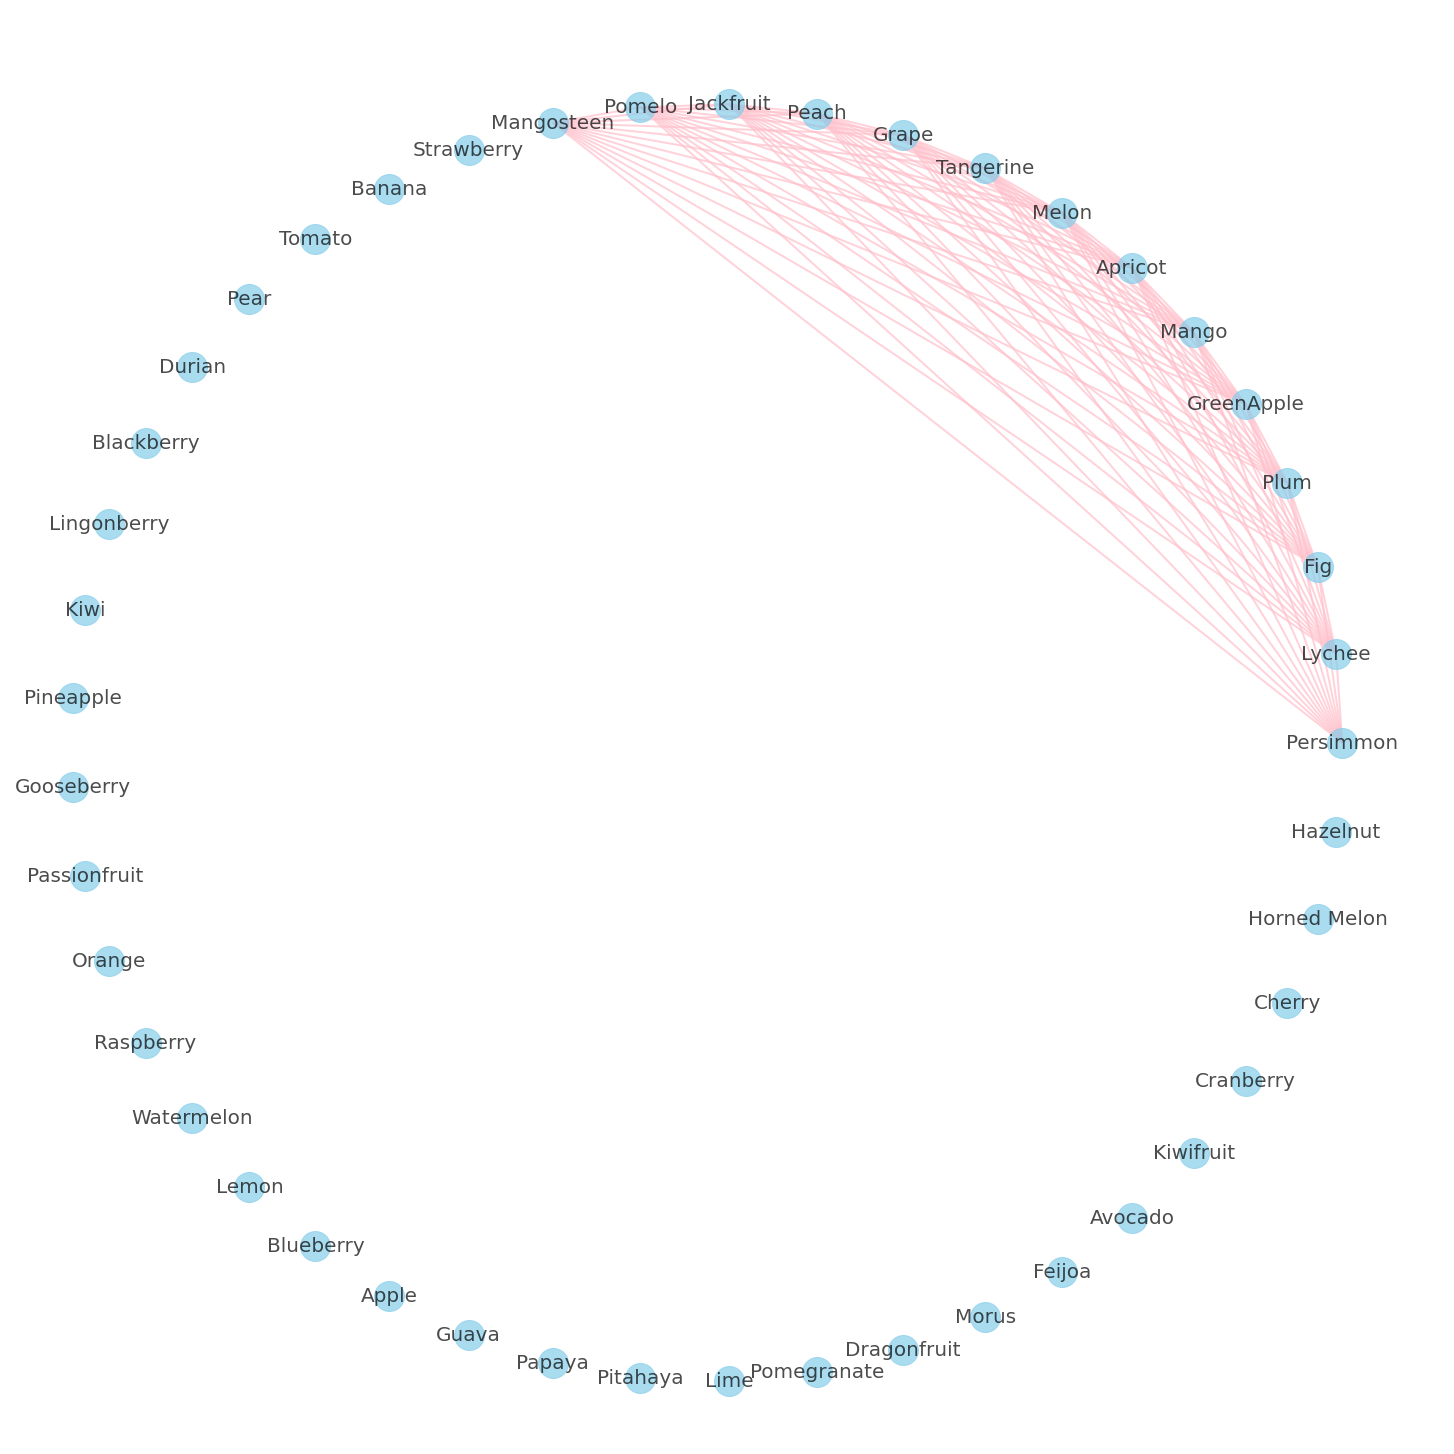

In [17]:
pos = nx.circular_layout(g)

plt.figure(figsize=(20, 20))
# Draw the graph with nodes and edges
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=900, font_size=20,
        width=2,  # Increase edge width
        edge_color='pink',  # Change edge color
        alpha=0.7,  # Reduce edge transparency
        style='solid'  
        )

plt.show()

In [18]:
sorted_dict = dict(sorted(big_3.items(), key=lambda item: item[1], reverse=True))

# Slice the top 3 items
top_3_items = dict(list(sorted_dict.items())[:3])

print(top_3_items)

{'GreenApple': 30.48, 'Melon': 23.53, 'Grape': 23.19}
